## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 31s 624us/step - loss: 2.2871 - acc: 0.1448 - val_loss: 2.2281 - val_acc: 0.1982
Epoch 2/500
50000/50000 [==============================] - 6s 123us/step - loss: 2.1973 - acc: 0.2206 - val_loss: 2.1673 - val_acc: 0.2490
Epoch 3/500
50000/50000 [==============================] - 6s 122us/step - loss: 2.1419 - acc: 0.2559 - val_loss: 2.1178 - val_acc: 0.2673
Epoch 4/500
50000/50000 [==============================] - 6s 122us/step - loss: 2.0960 - acc: 0.2744 - val_loss: 2.0757 - val_acc: 0.2822
Epoch 5/500
50000/50000 [==============================] - 6s 122us/step - loss: 2.0565 - acc: 0.2892 - val_loss: 2.0396 - val_acc: 0.2914
Epoch 6/500
50000/50000 [==============================] - 6s 122us/step - loss: 2.0228 - acc: 0.2980 - val_loss: 2.0089 - val_acc: 0.3046
Epoch 7/500
50000/50000 [==============================] - 7s 131us

50000/50000 [==============================] - 6s 115us/step - loss: 1.6550 - acc: 0.4243 - val_loss: 1.6599 - val_acc: 0.4240
Epoch 58/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6519 - acc: 0.4263 - val_loss: 1.6588 - val_acc: 0.4254
Epoch 59/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.6488 - acc: 0.4264 - val_loss: 1.6552 - val_acc: 0.4243
Epoch 60/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6460 - acc: 0.4270 - val_loss: 1.6547 - val_acc: 0.4224
Epoch 61/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6431 - acc: 0.4289 - val_loss: 1.6484 - val_acc: 0.4302
Epoch 62/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6399 - acc: 0.4302 - val_loss: 1.6473 - val_acc: 0.4271
Epoch 63/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.6371 - acc: 0.4316 - val_loss: 1.6430 - val_acc: 0.4314
Epoch 64/500
50000/50000 [=======

50000/50000 [==============================] - 6s 117us/step - loss: 1.5179 - acc: 0.4726 - val_loss: 1.5431 - val_acc: 0.4588
Epoch 116/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5162 - acc: 0.4728 - val_loss: 1.5417 - val_acc: 0.4591
Epoch 117/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.5144 - acc: 0.4732 - val_loss: 1.5479 - val_acc: 0.4598
Epoch 118/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.5125 - acc: 0.4741 - val_loss: 1.5411 - val_acc: 0.4601
Epoch 119/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5110 - acc: 0.4745 - val_loss: 1.5362 - val_acc: 0.4620
Epoch 120/500
50000/50000 [==============================] - 6s 117us/step - loss: 1.5089 - acc: 0.4748 - val_loss: 1.5361 - val_acc: 0.4617
Epoch 121/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.5071 - acc: 0.4768 - val_loss: 1.5358 - val_acc: 0.4635
Epoch 122/500
50000/50000 [

50000/50000 [==============================] - 6s 115us/step - loss: 1.4222 - acc: 0.5034 - val_loss: 1.4721 - val_acc: 0.4828
Epoch 174/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.4210 - acc: 0.5042 - val_loss: 1.4785 - val_acc: 0.4773
Epoch 175/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.4198 - acc: 0.5047 - val_loss: 1.4720 - val_acc: 0.4864
Epoch 176/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.4177 - acc: 0.5055 - val_loss: 1.4691 - val_acc: 0.4851
Epoch 177/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.4165 - acc: 0.5054 - val_loss: 1.4697 - val_acc: 0.4864
Epoch 178/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.4149 - acc: 0.5059 - val_loss: 1.4677 - val_acc: 0.4883
Epoch 179/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.4132 - acc: 0.5073 - val_loss: 1.4689 - val_acc: 0.4826
Epoch 180/500
50000/50000 [

50000/50000 [==============================] - 6s 114us/step - loss: 1.3402 - acc: 0.5318 - val_loss: 1.4244 - val_acc: 0.4997
Epoch 232/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3392 - acc: 0.5334 - val_loss: 1.4213 - val_acc: 0.5011
Epoch 233/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3375 - acc: 0.5329 - val_loss: 1.4199 - val_acc: 0.4984
Epoch 234/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3363 - acc: 0.5340 - val_loss: 1.4195 - val_acc: 0.5001
Epoch 235/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3347 - acc: 0.5332 - val_loss: 1.4205 - val_acc: 0.5007
Epoch 236/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3338 - acc: 0.5341 - val_loss: 1.4204 - val_acc: 0.5023
Epoch 237/500
50000/50000 [==============================] - 6s 114us/step - loss: 1.3324 - acc: 0.5362 - val_loss: 1.4302 - val_acc: 0.4965
Epoch 238/500
50000/50000 [

50000/50000 [==============================] - 6s 121us/step - loss: 1.2693 - acc: 0.5557 - val_loss: 1.3870 - val_acc: 0.5129
Epoch 290/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.2673 - acc: 0.5571 - val_loss: 1.4027 - val_acc: 0.5083
Epoch 291/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.2669 - acc: 0.5576 - val_loss: 1.4072 - val_acc: 0.5052
Epoch 292/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.2651 - acc: 0.5580 - val_loss: 1.4001 - val_acc: 0.5028
Epoch 293/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.2635 - acc: 0.5593 - val_loss: 1.3930 - val_acc: 0.5085
Epoch 294/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.2631 - acc: 0.5599 - val_loss: 1.3869 - val_acc: 0.5149
Epoch 295/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.2613 - acc: 0.5592 - val_loss: 1.4175 - val_acc: 0.4954
Epoch 296/500
50000/50000 [

50000/50000 [==============================] - 6s 121us/step - loss: 1.2013 - acc: 0.5801 - val_loss: 1.3699 - val_acc: 0.5167
Epoch 348/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.2024 - acc: 0.5813 - val_loss: 1.3605 - val_acc: 0.5242
Epoch 349/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.1997 - acc: 0.5826 - val_loss: 1.3695 - val_acc: 0.5163
Epoch 350/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.1986 - acc: 0.5804 - val_loss: 1.3680 - val_acc: 0.5173
Epoch 351/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.1979 - acc: 0.5815 - val_loss: 1.3681 - val_acc: 0.5151
Epoch 352/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.1974 - acc: 0.5811 - val_loss: 1.3683 - val_acc: 0.5160
Epoch 353/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.1973 - acc: 0.5818 - val_loss: 1.4220 - val_acc: 0.4983
Epoch 354/500
50000/50000 [

50000/50000 [==============================] - 6s 119us/step - loss: 1.1399 - acc: 0.6024 - val_loss: 1.3733 - val_acc: 0.5189
Epoch 406/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.1385 - acc: 0.6033 - val_loss: 1.3853 - val_acc: 0.5058
Epoch 407/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.1381 - acc: 0.6032 - val_loss: 1.3888 - val_acc: 0.5097
Epoch 408/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.1373 - acc: 0.6035 - val_loss: 1.3559 - val_acc: 0.5228
Epoch 409/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.1349 - acc: 0.6031 - val_loss: 1.3723 - val_acc: 0.5180
Epoch 410/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.1358 - acc: 0.6032 - val_loss: 1.3530 - val_acc: 0.5227
Epoch 411/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.1334 - acc: 0.6043 - val_loss: 1.3511 - val_acc: 0.5238
Epoch 412/500
50000/50000 [

50000/50000 [==============================] - 6s 120us/step - loss: 1.0815 - acc: 0.6227 - val_loss: 1.3534 - val_acc: 0.5236
Epoch 464/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0807 - acc: 0.6228 - val_loss: 1.3357 - val_acc: 0.5320
Epoch 465/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0802 - acc: 0.6243 - val_loss: 1.3805 - val_acc: 0.5186
Epoch 466/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.0789 - acc: 0.6256 - val_loss: 1.3543 - val_acc: 0.5207
Epoch 467/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0778 - acc: 0.6241 - val_loss: 1.3597 - val_acc: 0.5200
Epoch 468/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0759 - acc: 0.6251 - val_loss: 1.3351 - val_acc: 0.5268
Epoch 469/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.0748 - acc: 0.6255 - val_loss: 1.3384 - val_acc: 0.5277
Epoch 470/500
50000/50000 [

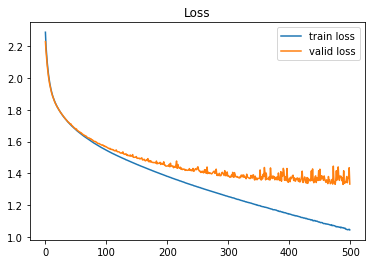

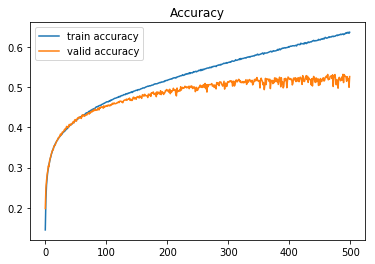

In [10]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()